In [12]:
import cv2 as cv
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix

from src.GeneticPacking import GeneticPacking
from src.ItemSelector import ItemSelector
from src.Utils import get_centroid

Проверим работу алгоритма на датабанке, за исключением семплов 28,29 (из "испорченных").

In [6]:
true_values = [True, True, False, True, True,
                   True, True, False, True, True,
                   False, True, False, True, True,
                   True, True, False, True, True,
                   False, True, False, False, True,
                   True, True, False, False, True,
                   False, True, False, True, False,
                   True, False, True, True, False,
                   True, True, False, True
                  ]

In [7]:
def display_confusion_matrix(cf_matrix):
    group_names = ['True 1', 'False 2', 'False 1', 'True 2']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)

    hmap = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='OrRd')
    lbs = [1, 2]
    plt.show()


def calculate_metrics(cf_matrix):
    TN = cf_matrix[0][0]
    FN = cf_matrix[1][0]
    TP = cf_matrix[1][1]
    FP = cf_matrix[0][1]
    A = (TN + TP) / (TN + TP + FN + FP)
    P = TP / (TP + FP)
    R = TP / (TP + FN)
    # F1 = 2 * P * R / (P + R)
    df = pd.DataFrame(dict(metrics=['Accuracy', 'Precision', 'Recall'],
                           value=[A, P, R]))
    return df

In [ ]:
rng = [range(1, 28), range(30, 47)]
predict = []
for i in rng:
    for j in i:
        print(j)
        img = cv.imread('tests/'+str(j)+'.jpg')
        selector = ItemSelector(work_size=(608, 608), min_area=400)
        obj_contours, poly_countour = selector.select(img)
        packing = GeneticPacking(poly_countour)
        predict.append(packing.pack(obj_contours))


     metrics     value
0   Accuracy  0.636364
1  Precision  0.428571
2     Recall  1.000000


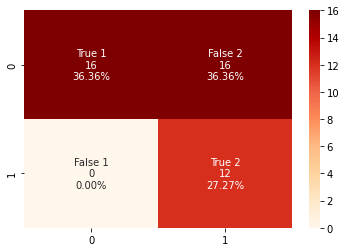

In [14]:
cm = confusion_matrix(predict, true_values)
print(calculate_metrics(cm))
display_confusion_matrix(cm)

Отметим, что заданная конфигурация алгоритма полностью отсеивает ложноположительный результат, что может стать значительным преимуществом для использования его в ряде задач.
Дальнейшее улучшение алгоритма может быть связано с введением новых эвристик, в частности, в рамках построения популяций в генетическом алгоритме.